In [1]:
# data -> Mall_customers.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
# seprate input and output

In [9]:
x = df.iloc[:, [3, 4]]

In [10]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


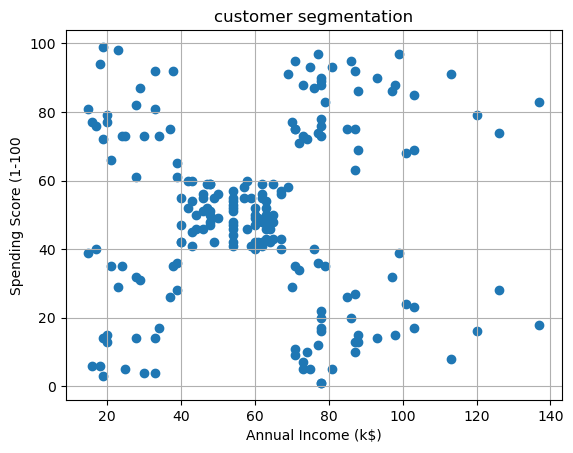

In [25]:
# scatter plot

plt.title('customer segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.grid()

In [14]:
# kmeans

In [16]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(random_state= 0, n_clusters = 3)

In [24]:
labels = km.fit_predict(x)
labels

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [26]:
km.inertia_

106348.37306211122

In [28]:
# elbow method

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
sse =[]

In [46]:
for i in range(1, 31):
    km = KMeans(random_state=0, n_clusters = i)
    labels = km.fit_predict(x)
    inertia = km.inertia_
    sse.append(inertia)

In [47]:
sse;

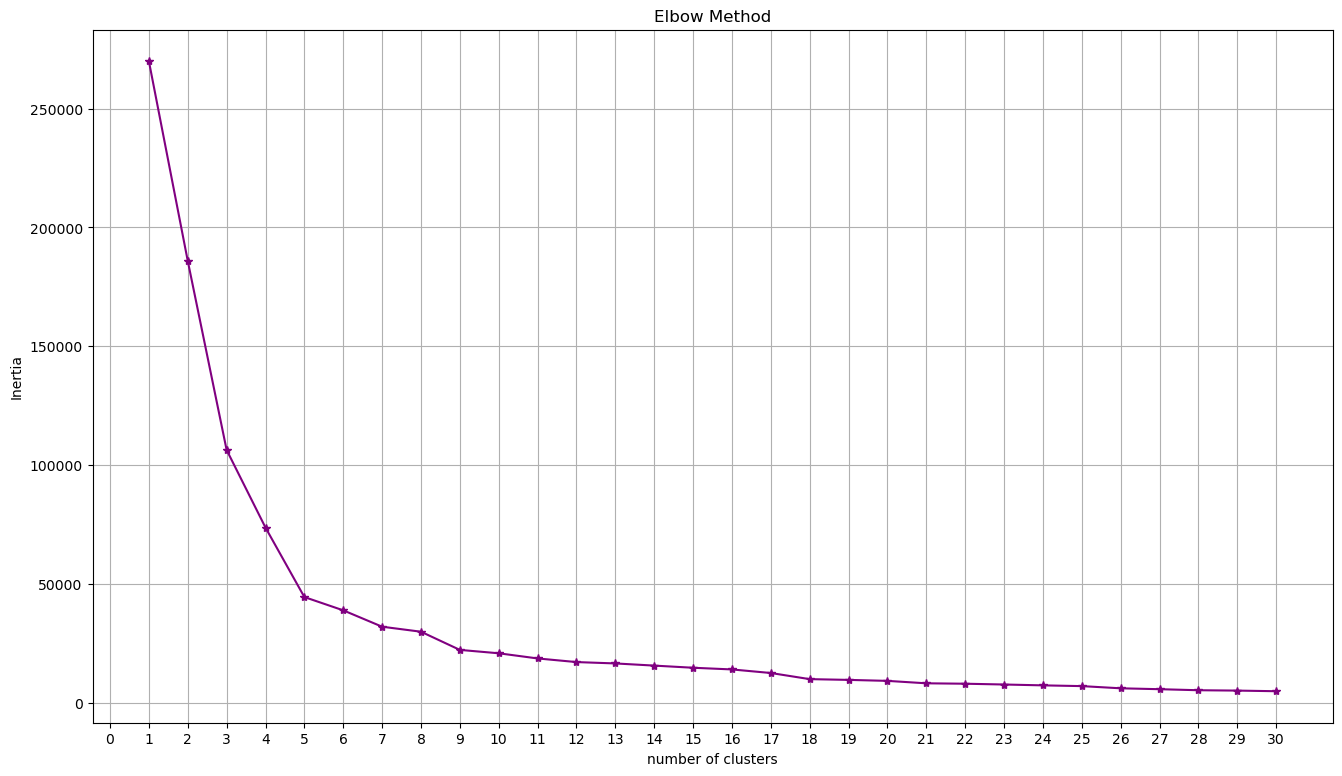

In [48]:
plt.figure(figsize=(16, 9))
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(0, 31, 1))
plt.plot(range(1, 31), sse, color = 'purple', marker = "*")
plt.grid();

In [54]:
KMeans(random_state=0, n_clusters=5)

KMeans(n_clusters=5, random_state=0)

In [55]:
labels = km.fit_predict(x)

In [56]:
labels

array([ 3,  7,  4,  7,  3,  7,  4, 20,  4,  7,  4, 20,  4,  7,  4,  7,  3,
        7,  3, 20,  3,  7,  4,  7, 19, 13, 10,  5, 10, 13, 19,  5, 19, 13,
       19, 13, 19,  5, 10,  5, 10, 13, 10,  5, 10,  5, 26, 16, 16, 16, 26,
       26, 26, 26, 16, 16, 16, 16, 26, 16, 26, 26, 26, 26, 26, 26, 16, 16,
       26, 16, 26, 25, 25,  9, 25,  9,  9, 25,  9, 25,  9,  9, 25, 25,  9,
       25,  9,  9, 27,  0, 27,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,
       27, 27, 27,  0,  0,  0,  0,  0, 27, 27,  0,  0,  0,  0,  0, 27,  0,
       27, 27,  0, 27,  1, 15, 18, 15,  1, 17, 18, 17, 18, 15, 18, 17,  1,
       17, 18, 17, 18, 17,  1, 15,  1,  8,  1, 15, 18,  8,  1,  8,  1,  8,
       18,  8,  1, 17, 18, 17, 18, 15,  1, 17,  1, 28, 12, 28, 29, 28, 12,
        8, 12,  8, 29,  8, 29,  8, 12,  2, 29, 23, 14,  2, 14, 23, 14,  2,
       24,  2, 14,  2, 24, 22, 21, 22, 21, 22, 21, 11,  6])

In [57]:
km.inertia_

4817.190218959782

In [58]:
km.cluster_centers_

array([[ 62.34782609,  45.04347826],
       [ 75.90909091,  90.36363636],
       [ 99.6       ,  18.6       ],
       [ 20.        ,  35.6       ],
       [ 19.57142857,   8.85714286],
       [ 34.5       ,  68.        ],
       [137.        ,  83.        ],
       [ 19.66666667,  74.88888889],
       [ 82.11111111,  15.33333333],
       [ 54.22222222,  54.55555556],
       [ 35.        ,  31.33333333],
       [137.        ,  18.        ],
       [ 86.75      ,  70.5       ],
       [ 32.2       ,  86.8       ],
       [ 99.25      ,  89.        ],
       [ 74.16666667,  34.83333333],
       [ 44.        ,  45.81818182],
       [ 74.88888889,   6.        ],
       [ 74.2       ,  74.4       ],
       [ 31.6       ,  10.6       ],
       [ 20.        ,  97.        ],
       [119.66666667,  81.33333333],
       [119.66666667,  17.33333333],
       [ 98.        ,  35.5       ],
       [102.        ,  68.5       ],
       [ 52.875     ,  44.875     ],
       [ 45.35714286,  55.57142857],
 

In [59]:
# seperate the columns

In [60]:
one = df[labels == 1]

In [61]:
one.shape

(11, 5)

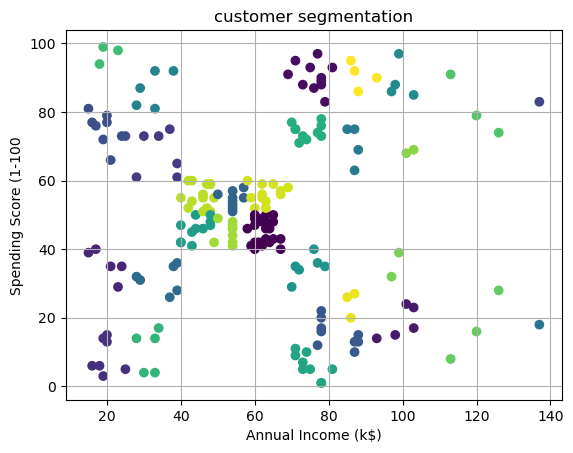

In [63]:
plt.title('customer segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c = labels)
plt.grid()